<a href="https://colab.research.google.com/github/Nathalia-Prada/proyecto-integrador-equipo25/blob/main/Avance3Equipo25/Avance3Equipo25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avance 3. Baseline**

Objetivos:

- 3.1 Establecer las medidas de calidad del modelo de aprendizaje automático.

- 3.2 Proporcionar un marco de referencia para evaluar y mejorar modelos más avanzados.



###**Equipo 25**


### Estudiantes


* A01793899 - Andrés Julián López Hurtado
* A01793999 - Nathalia Milena Prada Hernández
* A01794404 - Victor Alejandro Regueira Romero

Fecha: 6 de octubre de 2024

# Instrucciones

Este avance consiste en construir un modelo de referencia (individual, NO ensambles) que permita evaluar la viabilidad del problema. Si el baseline tiene un rendimiento similar al azar, podría indicar que el problema es intrínsecamente difícil o que los datos no contienen suficiente información para predecir el objetivo. De lo contrario, el baseline podría como una solución mínima aceptable cuando se trabaja en escenarios donde incluso un modelo simple puede proporcionar valor.

Un baseline facilita también la gestión de expectativas, tanto dentro del equipo como con los stakeholders, pues proporciona una comprensión inicial de lo que se puede lograr con métodos simples antes de invertir tiempo y recursos en enfoques más complejos.

Las siguientes son algunas de las preguntas que deberán abordar durante esta fase:

* ¿Qué algoritmo (individual, NO ensambles) se puede utilizar como baseline para predecir las variables objetivo?
* ¿Se puede determinar la importancia de las características para el modelo generado? Recuerden que incluir características irrelevantes puede afectar negativamente el rendimiento del modelo y aumentar la complejidad sin beneficios sustanciales.
* ¿El modelo está sub/sobreajustando los datos de entrenamiento?
* ¿Cuál es la métrica adecuada para este problema de negocio?
* ¿Cuál debería ser el desempeño mínimo a obtener?

# Importar Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerías

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Rutas de archivos y carga de la base

In [ ]:
file_tabla_unida = '/content/drive/MyDrive/TECForza/df_union2.csv'

In [ ]:
df_tabla_unida = pd.read_csv(file_tabla_unida)
df_tabla_unida.head()

,name,date,total_distance_used_sum,total_fuel_used_sum,consumption,performance,distance,idlingDuration,idlingPercent,idlingDuration_hours,...,ExcessiveSpeedingCount,ExcessiveSpeedingDistance,HardAccelerationCount,HardAccelerationDistance,HarshBrakingCount,HarshBrakingDistance,HarshCorneringDuration,HarshCorneringCount,HarshCorneringDistance,MaxSpeed
0,986,2024-07-01,115.575006,15.321976,7.543088,0.132572,30.063228,08:12:02,87.0,8.20,...,159.0,50.848373,133.0,0.057267,1.0,0.000096,0.0,43.0,0.006195,83.885109
1,1038,2024-07-01,167.770170,25.096340,6.685045,0.149588,72.647624,06:53:43,62.0,6.90,...,19.0,2.382248,17.0,0.002865,0.0,0.000000,0.0,28.0,0.002594,76.428658
2,502,2024-07-02,1025.262150,68.948892,8.653096,0.067250,912.121800,11:00:31,46.0,11.01,...,105.5,38.452164,48.0,0.020623,0.5,0.000332,0.0,39.5,0.009367,42.874611
3,532,2024-07-02,1103.554896,75.817364,14.555437,0.068703,554.235964,01:34:01,14.0,1.57,...,3.5,0.055369,77.5,0.065764,0.0,0.000000,0.0,18.5,0.007460,38.835701
4,880,2024-07-02,857.491980,64.193796,13.357864,0.074862,429.840038,20:46:51,73.0,20.78,...,402.0,123.554245,59.0,0.020675,0.0,0.000000,0.0,37.0,0.020335,83.885109


#Moldelo 1: Árbol de decisión (Julián)

Primero, voy a separar la base de datos en X y Y. Y será sólo la columna "Consumption" y X todo lo demás. Luego haré algunos arreglos a cada una de las tablas.

In [ ]:
# Separar en X e Y
X = df_tabla_unida.drop(columns=['consumption'])  # X es todo menos la columna 'consumption'
Y = df_tabla_unida['consumption']  # Y es solo la columna 'consumption'

# Mostrar las primeras filas de X e Y
#print(X.head())
print(Y.head())

0     7.543088
1     6.685045
2     8.653096
3    14.555437
4    13.357864
Name: consumption, dtype: float64


##Ajustes de la variable de salida Y, consumtion

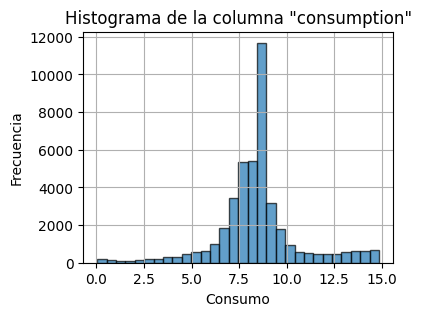

In [ ]:
import matplotlib.pyplot as plt

# Crear el histograma de Y (columna 'consumption')
plt.figure(figsize=(4, 3))
plt.hist(Y, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de la columna "consumption"')
plt.xlabel('Consumo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Voy a crear cuatro grupos dependiendo del valor de consumption: S, M, L y XL. Esto para poder crear una variable discreta para el árbol de decisión de tipo clasificación. Los valores umbrales se escogieron para que la cantidad de elementos en cada grupo sea aproximadamente igual y no se cree un problema de desbalaceo en los datos de Y. Los umblares son:

* Grupo S: Rango (0.0392, 7.5566) - Cantidad: 10,759
* Grupo M: Rango (7.5566, 8.5477) - Cantidad: 10,758
* Grupo L: Rango (8.5477, 8.9567) - Cantidad: 10,759
* Grupo XL: Rango (8.9567, 14.8651) - Cantidad: 10,757

El histograma lyuego de realizar esta clasificación quedaría así:


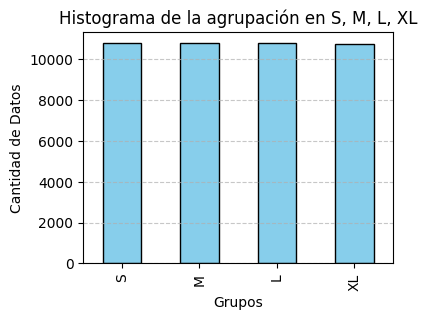

In [ ]:
# Dividir los datos de Y en 4 grupos de igual tamaño
quantiles = Y.quantile([0.25, 0.5, 0.75])

# Definir los rangos para cada grupo
rango_S = (Y.min(), quantiles[0.25])
rango_M = (quantiles[0.25], quantiles[0.5])
rango_L = (quantiles[0.5], quantiles[0.75])
rango_XL = (quantiles[0.75], Y.max())

# Contar cuántos datos quedan en cada grupo
grupo_S = Y[(Y >= rango_S[0]) & (Y <= rango_S[1])].count()
grupo_M = Y[(Y > rango_M[0]) & (Y <= rango_M[1])].count()
grupo_L = Y[(Y > rango_L[0]) & (Y <= rango_L[1])].count()
grupo_XL = Y[(Y > rango_XL[0]) & (Y <= rango_XL[1])].count()

# Mostrar los resultados
rangos = {
    "S": {"rango": rango_S, "cantidad": grupo_S},
    "M": {"rango": rango_M, "cantidad": grupo_M},
    "L": {"rango": rango_L, "cantidad": grupo_L},
    "XL": {"rango": rango_XL, "cantidad": grupo_XL}
}




# Crear una nueva columna en el dataframe para las etiquetas de los grupos
df_tabla_unida['group'] = pd.cut(df_tabla_unida['consumption'],
                                 bins=[Y.min(), quantiles[0.25], quantiles[0.5], quantiles[0.75], Y.max()],
                                 labels=['S', 'M', 'L', 'XL'])

# Crear el histograma de la agrupación
plt.figure(figsize=(4, 3))
df_tabla_unida['group'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histograma de la agrupación en S, M, L, XL')
plt.xlabel('Grupos')
plt.ylabel('Cantidad de Datos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Ahora aplicamos este criterio para crear una Y_modificada

In [ ]:
# Crear la variable Y_modificada asignando letras según las reglas de los grupos
Y_modificada = pd.cut(Y,
                      bins=[Y.min(), quantiles[0.25], quantiles[0.5], quantiles[0.75], Y.max()],
                      labels=['S', 'M', 'L', 'XL'])

# Mostrar las primeras filas de Y_modificada para verificar
print(Y_modificada.head())


0     S
1     S
2     L
3    XL
4    XL
Name: consumption, dtype: category
Categories (4, object): ['S' < 'M' < 'L' < 'XL']


#Modelo 2: (Victor)

#Modelo 3: (Nathalia)